#**Graduate Rotational Internship Program (GRIP)**

**Name: Akshata Khedekar**

**Title: Prediction using Supervised ML**

**Level: Beginner**

**Batch: March**


#Step 1: Data Collection

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading dataset

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#Step 2: Understanding the Data

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#Step 3: Checking Nulls

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 4: Data Visualization

**ScatterPlot**

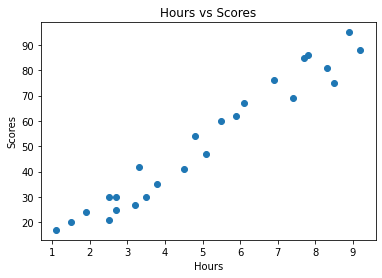

In [ ]:
# Plotting the distribution of scores
plt.scatter(data['Hours'],data['Scores'])  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

To see how the data is related with each other we are using here corr()function and to represent them we are using heatmap

In [ ]:
cor = data.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**HeatMap**

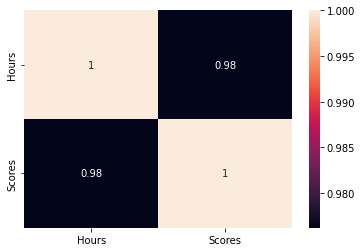

In [ ]:
sns.heatmap(cor, annot=True)

#Step 5: Model Building

Preparing Data

In [ ]:
X= data.iloc[:, 0:1]
y= data.iloc[:,-1]

In [ ]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

To test how the model’s performance,this is usually done by splitting the labelled data we have collected into two parts with 80%-20%. One part of the data is used to build the machine learning model, and is called the training data (i.e. X_train and y_train). The rest of the 20% data will be used to test how well the model works; this is called the test data(i.e. X_test, y_test).

X is having dependent variable.

Y is having independent variable 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Here we are using Linear Regression model to predict our data After that fitting/training the model on X_train and Y_train using .fit() method.

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

**Best-Fit Line**

Text(0, 0.5, 'Scores')

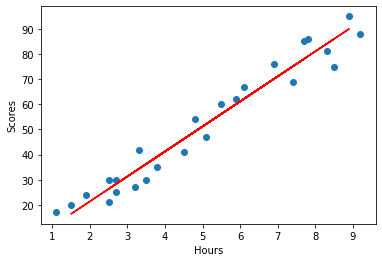

In [ ]:
plt.scatter(data['Hours'],data['Scores'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")


Then we are predicting on X_test using .predict() method.

**Model Evaluation**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
new_data = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})  
new_data 

,Original,Predicted
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


In [ ]:
lr.predict([[9.25]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([93.45860056])

**Calculating Slope**

In [ ]:
m = lr.coef_
m

array([9.94061514])

**Calculating Intercept**

In [ ]:
b = lr.intercept_
b

1.5079104828268939

In [ ]:
# y = mx + b

m *9.25 + b

array([93.45860056])

Checking accuracy how are model is accurate or how it is properly working on data

In [ ]:
from sklearn.metrics import accuracy_score
lr.score(X_test,y_test)

0.9735538080811826

For this model, the accuracy on the test set is 0.97, which means the model made the right prediction for 97% of the scores in the given dataset.